## Import The Needed Libraries

In [1]:
!pip install demoji
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.0 MB/s eta 0:00:00


In [2]:
# IMPORT THE NEEDED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

import re
import nltk
from collections import Counter
from wordcloud import WordCloud
import itertools
import string
import demoji
demoji.download_codes()
import contractions

# DOWNLOADING NEEDED NLTK RESOURCES
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

<ipython-input-2-3f6906d51e0d>:26: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Dataset Statistics

In [5]:
# LOADING DATASET AND READ THE FIRST 5 LINES
df = pd.read_csv("/content/cyberbullying_tweets.csv")
df.head()

tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying

In [ ]:
# RENAMING THE COLUMN NAMES FOR EASIER UNDERSTANDING
df = df.rename(columns={"tweet_text" : "tweet", "cyberbullying_type" : "label"})
df.head()

In [ ]:
# CREATE ADDITIONAL COLUMN TO CONTAIN THE CONBINED COLUMNS EXCEPT NOT-CYBERBULLYING TO HAVE A BINARY DATASET AND REP. AS 0 AND 1
labels = ['age', 'gender', 'religion', 'ethnicity', 'other_cyberbullying']
df['class'] = df['label'].apply(lambda x: 1 if x in labels else 0)
df.head()

In [ ]:
# SHUFFLING THE DATASET FOR EFFECTIVE TRAINING AND USING RANDOM STATE TO ENSURE CONSISTENCY
df_shuffled = shuffle(df, random_state=42)
df_shuffled.head()

tweet_text   cyberbullying_type
40362  @Goree_JuhssGuns hahaha he ain't even worth my...            ethnicity
15019  RT @hsaymssik: Sucks to have the smile wiped o...               gender
46321  Just a reminder, it's absolutely disgusting to...            ethnicity
23927  RT @BuzzFeedUK: When you accidentally open you...  other_cyberbullying
1640               Loving the look of the fritters! #mkr    not_cyberbullying

In [ ]:
# SHUFFLED THE DATASET FOR AN IMPROVED DATA TRAINING
df_shuffled.shape

(47692, 2)

In [ ]:
# DATA DESCRIPTION
df_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47692 entries, 40362 to 15795
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   47692 non-null  object
 1   label   47692 non-null  object
 2   class   47692 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


## Data Understanding Through Visualisations

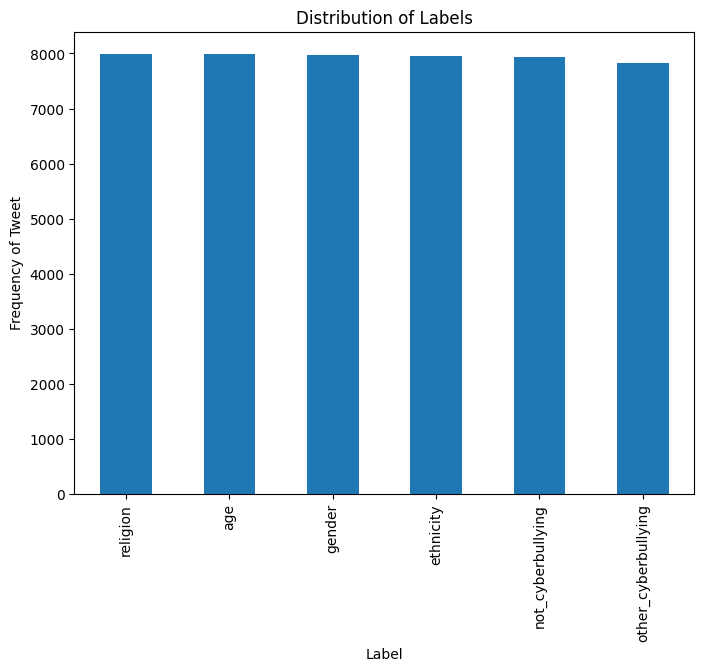

In [ ]:
# DISTRIBUTION OF THE LABEL COLUMN IN A BAR GRAPH
label_count=df_shuffled["label"].value_counts()
label_count.plot(kind="bar", figsize=(8,6))
plt.title("Distribution of Labels")
plt.xlabel("Label")
plt.ylabel("Frequency of Tweet")
plt.show()

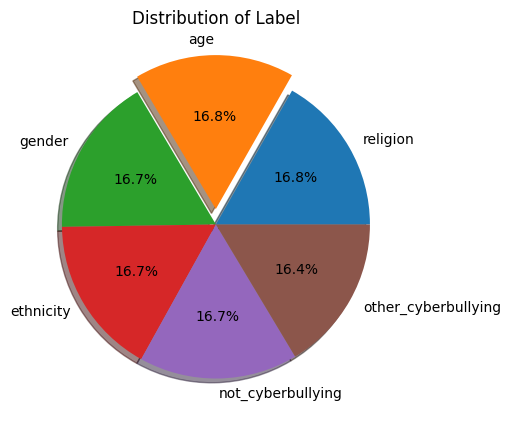

In [ ]:
# DISTRIBUTION OF THE LABEL COLUMN IN A PIE CHART
explode = [0.1 if i == 1 else 0 for i in range(6)]

# Plotting the pie chart
plt.figure(figsize=(10, 5))
df_shuffled['label'].value_counts().plot.pie(explode=explode, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 10})
plt.title('Distribution of Label', fontsize=12)
plt.ylabel('')  # Hide the default ylabel which is not needed for a pie chart
plt.show()

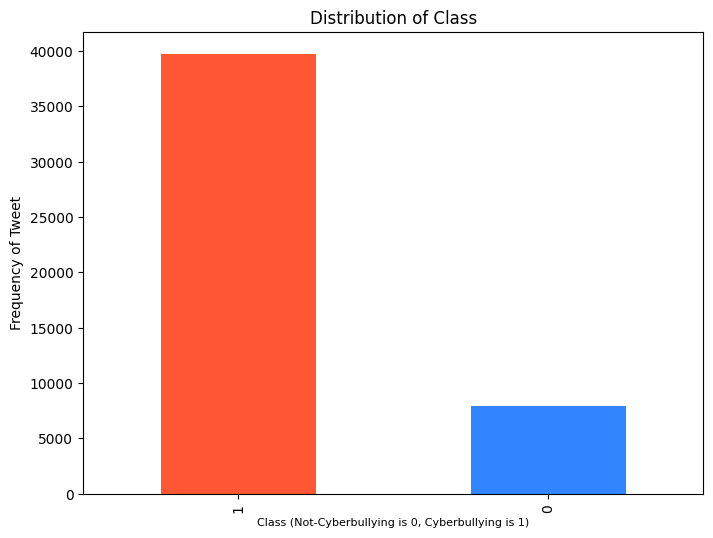

In [ ]:
# DISTRIBUTION OF THE CLASS COLUMN (BINARY) IN A BAR GRAPH
label_count=df_shuffled["class"].value_counts()
label_count.plot(kind="bar", figsize=(8,6), color =['#FF5733', '#3385FF'])
plt.title("Distribution of Class")
plt.xlabel('Class (Not-Cyberbullying is 0, Cyberbullying is 1)', fontsize=8)
plt.ylabel("Frequency of Tweet")
plt.show()

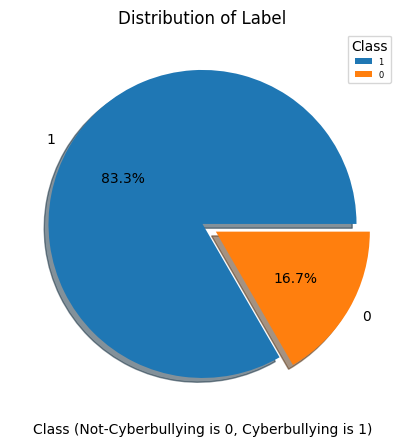

In [ ]:
# DISTRIBUTION OF THE CLASS COLUMN (BINARY) IN A PIE CHART
explode = [0.1 if i == 1 else 0 for i in range(2)]

# Plotting the pie chart
plt.figure(figsize=(10, 5))
df_shuffled['class'].value_counts().plot.pie(explode=explode, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 10})
plt.title('Distribution of Label', fontsize=12)
plt.legend(title='Class', fontsize = 6)
plt.xlabel('Class (Not-Cyberbullying is 0, Cyberbullying is 1)', fontsize=10)
plt.ylabel('')  # Hide the default ylabel which is not needed for a pie chart
plt.show()

<ipython-input-16-36b515c0c5f1>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tweet_length), y=list(tweet_length.index), palette='viridis')


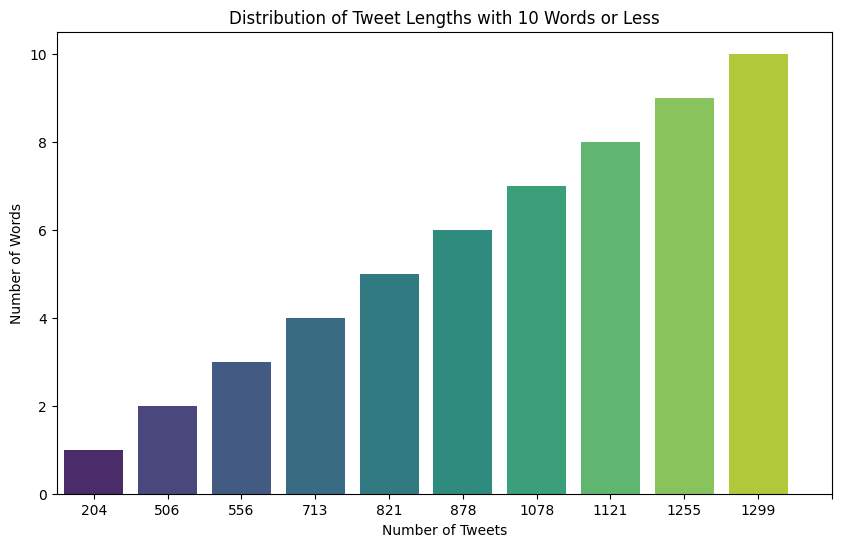

In [ ]:
# DISTRIBUTION OF TWEET LENGTH WITH 10 WORDS OR LESS
# Define the word count function
def word_count(text):
    return len(text.split())

# Apply the function to create a new column for word counts
df_shuffled['word_count'] = df_shuffled['tweet'].apply(word_count)

# Filter the tweets to include only those with fewer than 11 words
selected_df = df_shuffled[df_shuffled['word_count'] < 11]

# Count the number of words for each tweet length between 0 and 11
tweet_length = selected_df['word_count'].value_counts().sort_index()

# Plot the distribution using a barplot
plt.figure(figsize=(10, 6))
#sns.barplot(y=tweet_length_distribution.index, x=tweet_length_distribution.values, palette='viridis')
sns.barplot(x=list(tweet_length), y=list(tweet_length.index), palette='viridis')
#sns.barplot(x=tweet_length_distribution.index, y=tweet_length_distribution.values, palette='viridis')
plt.title('Distribution of Tweet Lengths with 10 Words or Less')
plt.xlabel('Number of Tweets')
plt.ylabel('Number of Words')
plt.xticks(range(0, 11))
plt.show()

<ipython-input-14-ae8c43ad6b11>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


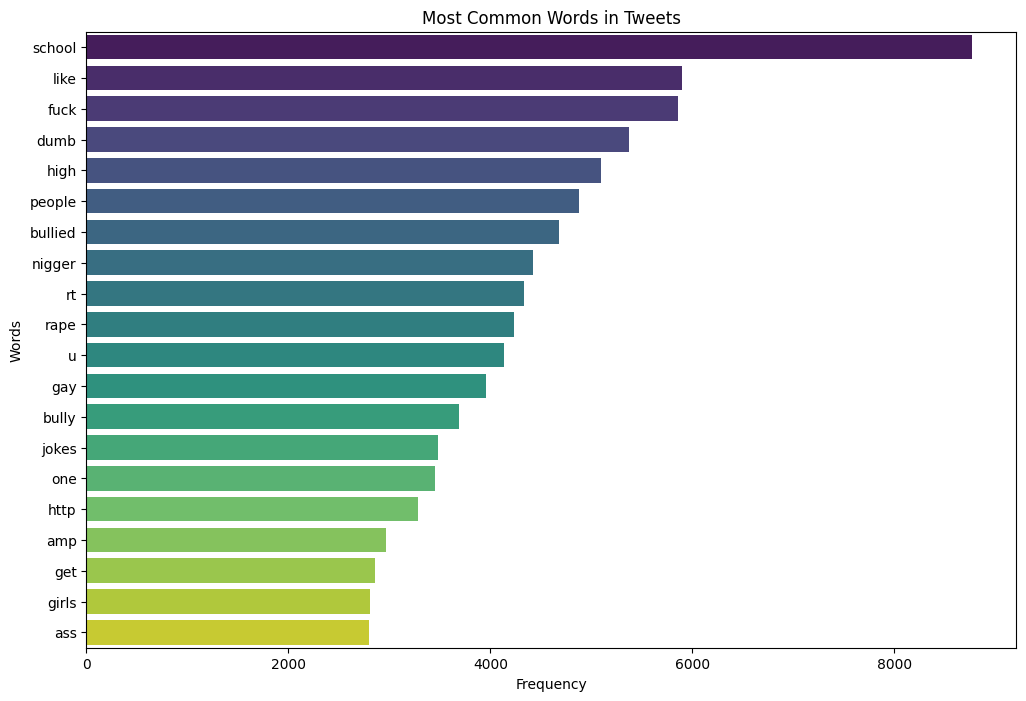

In [ ]:
# Preprocess text for word frequency analysis
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# DISPLAY 20 MOST COMMON WORDS IN THE DATASET
# Apply preprocessing and create a list of all words
all_words = df_shuffled['tweet'].apply(preprocess_text).sum()

# Count the frequency of each word
word_freq = Counter(all_words)

# Get the most common words
most_common_words = word_freq.most_common(20)

# Plot the most common words
words, counts = zip(*most_common_words)
plt.figure(figsize=(12, 8))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title('Most Common Words in Tweets')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [ ]:
# Generate a word cloud
#wordcloud = WordCloud(width=800, height=400, background_color='white', contour_width=1, contour_color='black', colormap = 'viridis').generate_from_frequencies(word_freq)

# Plot the word cloud
#plt.figure(figsize=(10, 6))
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.title('Word Cloud of Common Words in Tweets')
#plt.axis('off')  # Hide the axes
#plt.show()

<ipython-input-15-4b2bc16e3ae2>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


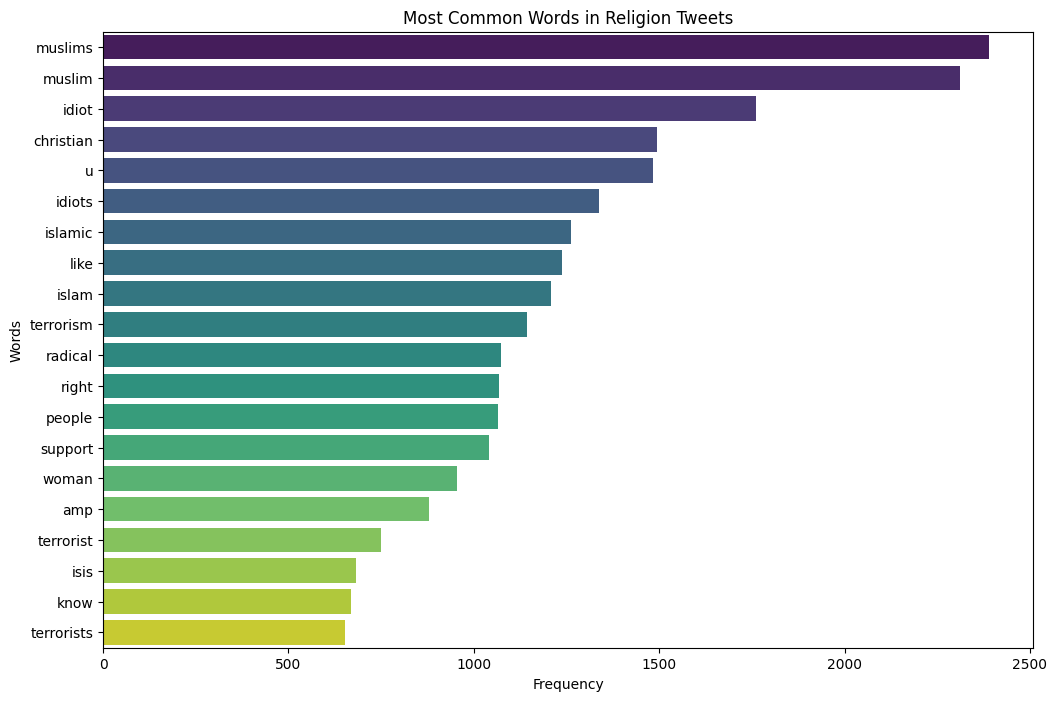

<ipython-input-15-4b2bc16e3ae2>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


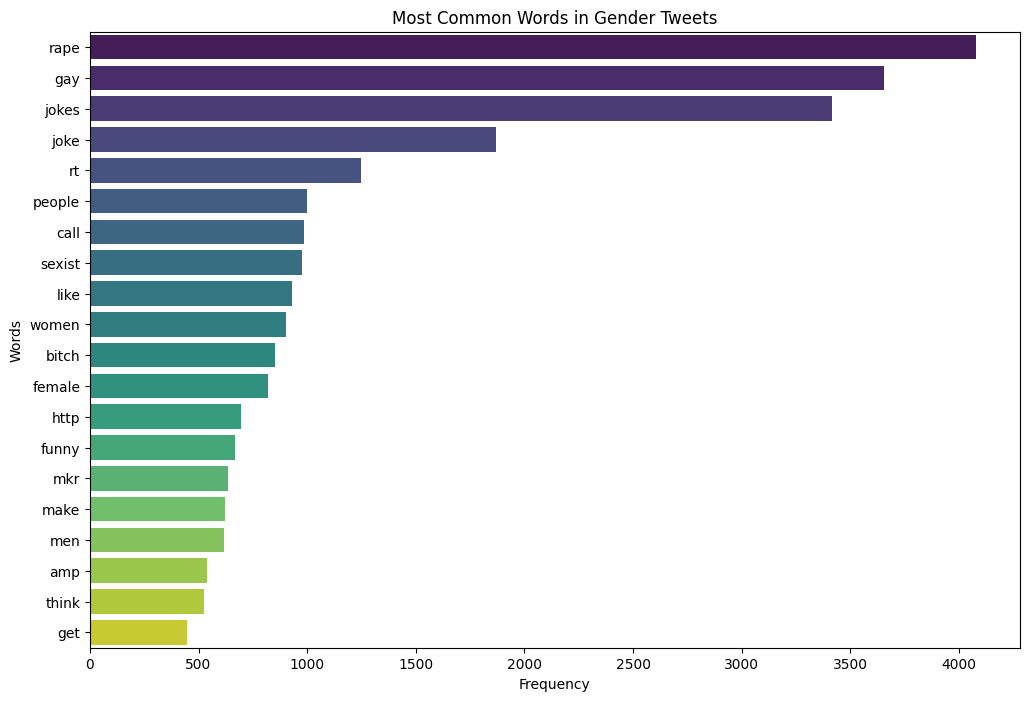

<ipython-input-15-4b2bc16e3ae2>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


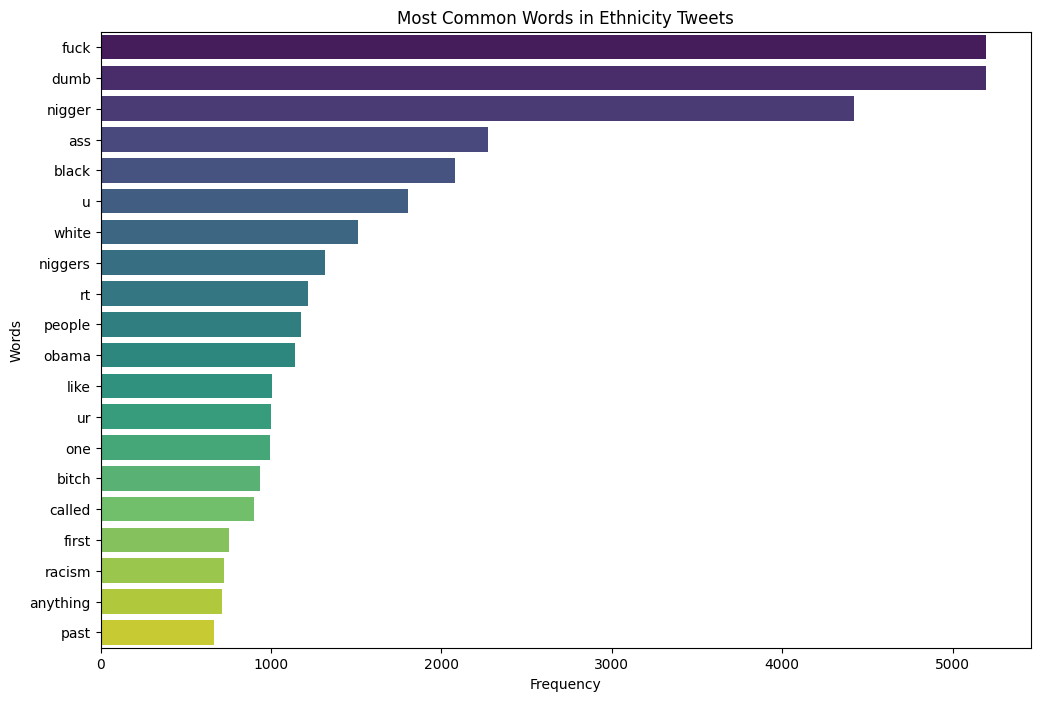

<ipython-input-15-4b2bc16e3ae2>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


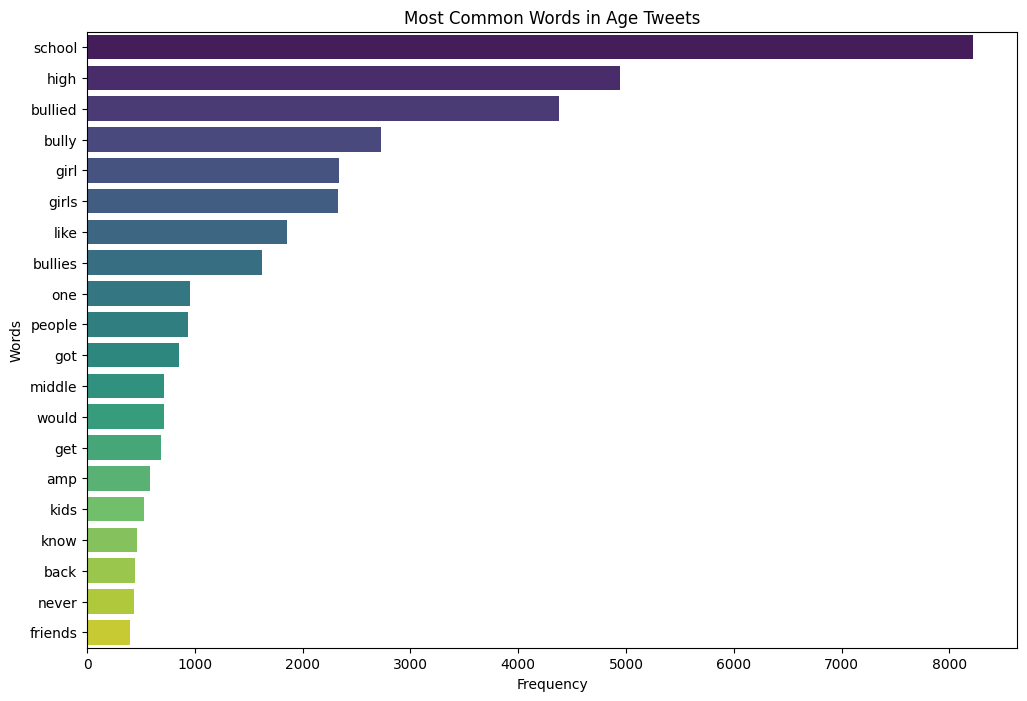

In [ ]:
# DISPLAY 20 MOST COMMON WORDS IN RELIGION, GENDER AND ETHNICITY

labels = ['religion', 'gender', 'ethnicity', 'age']

# Loop through each label
for label in labels:
    # Step 1: Filter the DataFrame for the current label
    label_tweets = df_shuffled[df_shuffled['label'] == label]

    # Step 2: Apply preprocessing and create a list of all words for the current label's tweets
    all_words_label = list(itertools.chain(*label_tweets['tweet'].apply(preprocess_text)))

    # Step 3: Count the frequency of each word
    word_freq_label = Counter(all_words_label)

    # Step 4: Get the most common words
    most_common_words_label = word_freq_label.most_common(20)

    if most_common_words_label:
        # Unpack the words and counts
        words, counts = zip(*most_common_words_label)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(f'Most Common Words in {label.capitalize()} Tweets')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

<ipython-input-16-3161aec1da8d>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


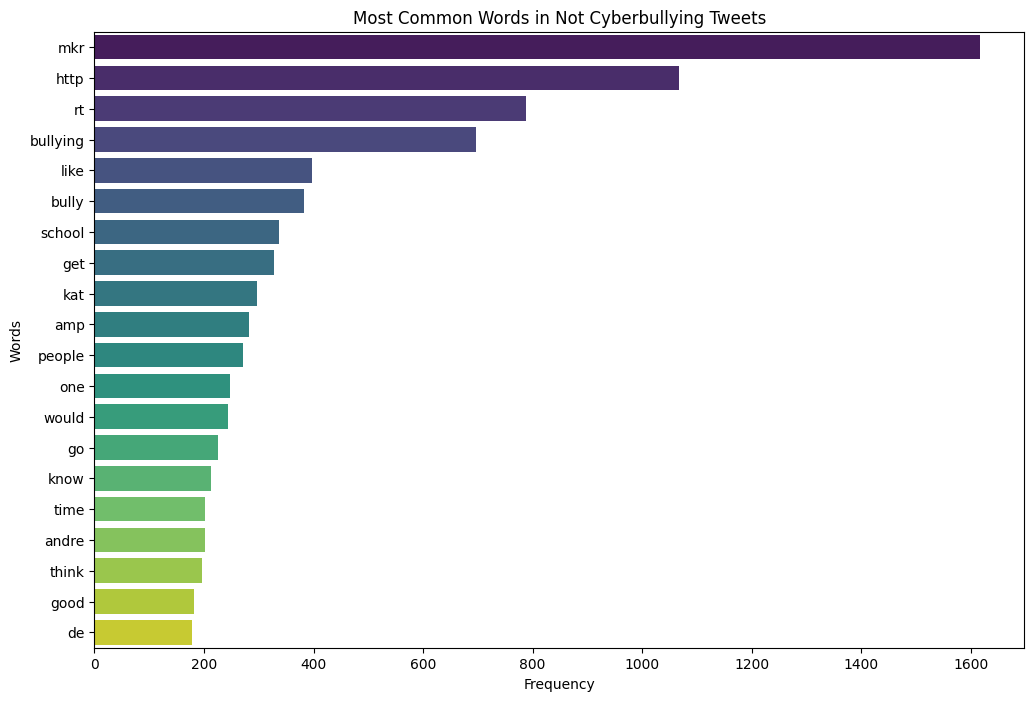

<ipython-input-16-3161aec1da8d>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


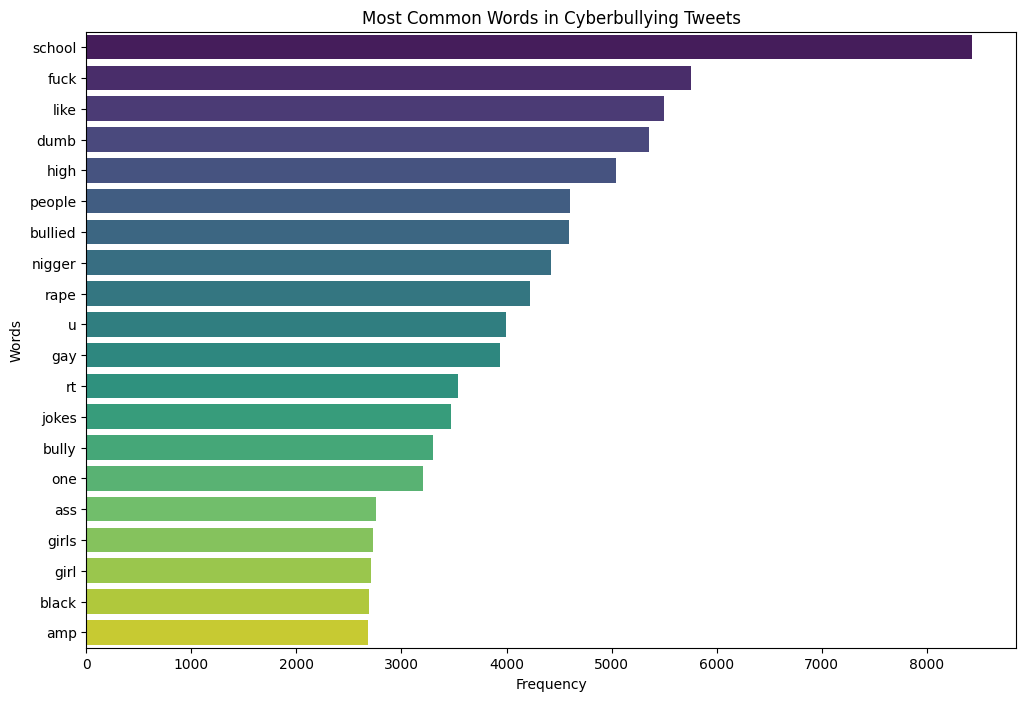

In [ ]:
# DISPLAY 20 MOST COMMON WORDS IN THE CYBERBULLYING AND NOT CYBERBULLYING CLASS
# Define labels
labels = {0: 'Not Cyberbullying', 1: 'Cyberbullying'}

# Loop through each label
for label_value, label_name in labels.items():
    # Step 1: Filter the DataFrame for the current label
    label_tweets = df_shuffled[df_shuffled['class'] == label_value]

    # Step 2: Apply preprocessing and create a list of all words for the current label's tweets
    all_words_label = list(itertools.chain(*label_tweets['tweet'].apply(preprocess_text)))

    # Step 3: Count the frequency of each word
    word_freq_label = Counter(all_words_label)

    # Step 4: Get the most common words
    most_common_words_label = word_freq_label.most_common(20)

    if most_common_words_label:
        # Unpack the words and counts
        words, counts = zip(*most_common_words_label)

        # Plot the most common words
        plt.figure(figsize=(12, 8))
        sns.barplot(x=list(counts), y=list(words), palette='viridis')
        plt.title(f'Most Common Words in {label_name} Tweets')
        plt.xlabel('Frequency')
        plt.ylabel('Words')
        plt.show()

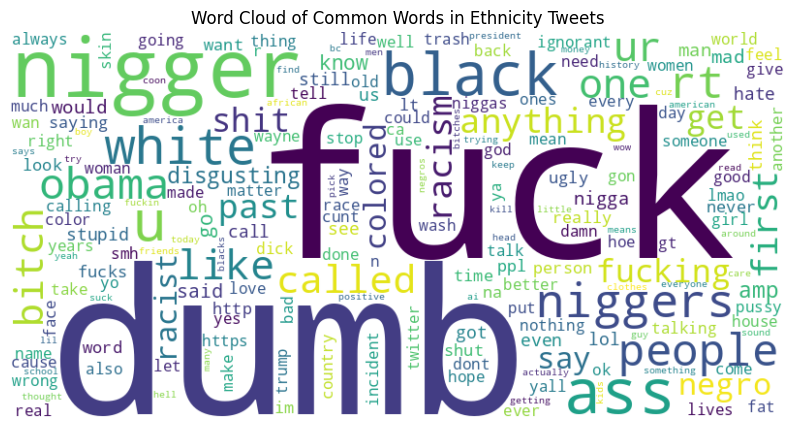

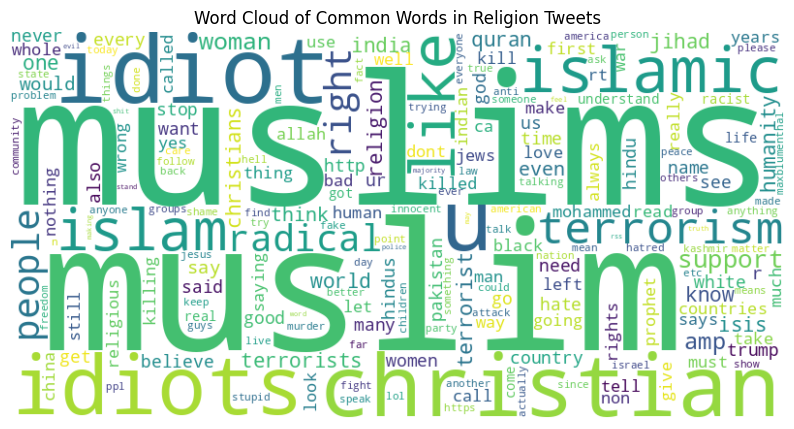

No words to display for label 'sex'


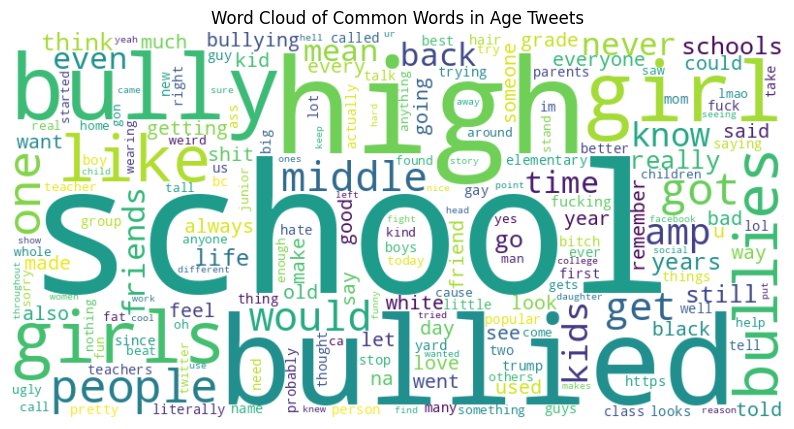

In [ ]:
#DISPLAY WORDCLOUD FOR THE LABEL
# List of labels to analyze
labels = ['ethnicity', 'religion', 'sex', 'age']

# Loop through each label
for label in labels:
    # Step 1: Filter the DataFrame for the current label
    label_tweets = df_shuffled[df_shuffled['label'] == label]

    # Step 2: Apply preprocessing and concatenate all lists of words for the current label's tweets
    all_words_label = list(itertools.chain(*label_tweets['tweet'].apply(preprocess_text)))

    # Step 3: Count the frequency of each word
    word_freq_label = Counter(all_words_label)

    # Step 4: Check if there are words to generate a word cloud
    if word_freq_label:
        # Step 5: Generate the word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white',
                              contour_width=1, contour_color='black',
                              colormap='viridis').generate_from_frequencies(word_freq_label)

        # Step 6: Plot the word cloud
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud of Common Words in {label.capitalize()} Tweets')
        plt.axis('off')  # Hide the axes
        plt.show()
    else:
        print(f"No words to display for label '{label}'")

# Preprocessing Data

In [ ]:
#CHECK FOR DUPLICATE
df_shuffled.duplicated().sum()

0

In [ ]:
df_shuffled[df_shuffled.duplicated()].head()

Empty DataFrame
Columns: [tweet, label, class, df_contractions, df_cleaned]
Index: []

In [ ]:
duplicate_counts = df_shuffled[df_shuffled.duplicated(subset=['tweet', 'class'])]['class'].value_counts()
duplicate_df = pd.DataFrame({
    'Class': ['Not Cyberbullying' if i == 0 else 'Cyberbullying' for i in duplicate_counts.index],
    'Number of Duplicates': duplicate_counts.values
})
duplicate_df

Class  Number of Duplicates
0  Cyberbullying                   128

In [ ]:
df_shuffled.drop_duplicates(inplace=True)
df_shuffled.duplicated().sum()

0

In [ ]:
df_shuffled.shape

(47259, 5)

In [ ]:
#EXPANDING CONTRACTIONS TO FULL WORDS
df_shuffled['df_contractions'] = df_shuffled['tweet'].apply(contractions.fix)
df_shuffled.head()

tweet                label  \
0  @Goree_JuhssGuns hahaha he ain't even worth my...            ethnicity   
1  RT @hsaymssik: Sucks to have the smile wiped o...               gender   
2  Just a reminder, it's absolutely disgusting to...            ethnicity   
3  RT @BuzzFeedUK: When you accidentally open you...  other_cyberbullying   
4              Loving the look of the fritters! #mkr    not_cyberbullying   

   class                                    df_contractions  \
0      1  @Goree_JuhssGuns hahaha he are not even worth ...   
1      1  RT @hsaymssik: Sucks to have the smile wiped o...   
2      1  Just a reminder, it is absolutely disgusting t...   
3      1  RT @BuzzFeedUK: When you accidentally open you...   
4      0              Loving the look of the fritters! #mkr   

                                          df_cleaned  
0  hahaha even worth tweet dumb fuck knw differ n...  
1  suck smile wipe face huh kat glass hous throw ...  
2  remind absolut disgust see peopl would prank c...  
3                         accident open front camera  
4                              love look fritter mkr

In [ ]:
porter_stemmer = PorterStemmer()
#snowball_stemmer = SnowballStemmer('english')

In [ ]:
#PREPROCESSING FOR VECTORIZATION
# Function to clean text
def clean_text(text):
    # Remove usernames (anything starting with @)
    text = re.sub(r'@\w+', '', text)

    # Remove URL
    text = re.sub(r'http\S+|www.\S+', '', text)

    # Remove emojis
    text = demoji.replace(text, "")

    # Remove rt (Retweet)
    text = re.sub(r'\bRT\b', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Lower Casing
    text = text.lower()

    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize
    tokens = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

   # Stemming
    tokens = [porter_stemmer.stem(token) for token in tokens]

    # Join tokens back into a string
    text = ' '.join(tokens)

    return text

In [ ]:
df_shuffled['df_cleaned'] = df_shuffled['df_contractions'].apply(clean_text)
df_shuffled.head()

tweet                label  \
40362  @Goree_JuhssGuns hahaha he ain't even worth my...            ethnicity   
15019  RT @hsaymssik: Sucks to have the smile wiped o...               gender   
46321  Just a reminder, it's absolutely disgusting to...            ethnicity   
23927  RT @BuzzFeedUK: When you accidentally open you...  other_cyberbullying   
1640               Loving the look of the fritters! #mkr    not_cyberbullying   

       class                                    df_contractions  \
40362      1  @Goree_JuhssGuns hahaha he are not even worth ...   
15019      1  RT @hsaymssik: Sucks to have the smile wiped o...   
46321      1  Just a reminder, it is absolutely disgusting t...   
23927      1  RT @BuzzFeedUK: When you accidentally open you...   
1640       0              Loving the look of the fritters! #mkr   

                                              df_cleaned  
40362  hahaha even worth tweet dumb fuck knw differ n...  
15019  suck smile wipe face huh kat glass hous throw ...  
46321  remind absolut disgust see peopl would prank c...  
23927                         accident open front camera  
1640                               love look fritter mkr

# Load Preprocessed Data

---



In [ ]:
#path = '/content/drive/MyDrive/MSc Dissertation'
#df_shuffled.to_csv(path + '/df_shuffled.csv', index=False)

In [6]:
import pandas as pd
path = '/content/drive/MyDrive/MSc Dissertation'
df_shuffled=pd.read_csv(path + '/df_shuffled.csv')

In [ ]:
#df_shuffled.head()

In [7]:
null_counts = df_shuffled.isnull().sum()
null_counts

tweet                0
label                0
class                0
df_contractions      0
df_cleaned         397
dtype: int64

In [8]:
df_shuffled = df_shuffled.dropna()

In [9]:
# SPLIT DATASET INTO FEATURES AND LABELS
X = df_shuffled['df_cleaned']
y = df_shuffled['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (37807,)
X_test shape: (9452,)
y_train shape: (37807,)
y_test shape: (9452,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df_shuffled is your DataFrame
X = df_shuffled['df_cleaned']
y = df_shuffled['class']

# Split the data first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_vectorized = vectorizer.transform(X_test)

# Building ML Models,TF-IDF, Cross Validation & Learning Curve

#Logistic Regression


Logistic Regression Results:
Cross-validation scores: [0.86048664 0.87027241 0.8676101  0.87237138 0.86602301]
Mean cross-validation accuracy: 0.8674 (+/- 0.0081)
Training Accuracy: 0.8971
Testing Accuracy: 0.8736
Difference in Training and Cross-validation Accuracy: 0.0298
No significant overfitting

Training Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.45      0.59      6284
           1       0.90      0.99      0.94     31523

    accuracy                           0.90     37807
   macro avg       0.88      0.72      0.77     37807
weighted avg       0.89      0.90      0.88     37807


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.36      0.47      1512
           1       0.89      0.97      0.93      7940

    accuracy                           0.87      9452
   macro avg       0.80      0.66      0.70      9452
weighted avg       0.86      0.87

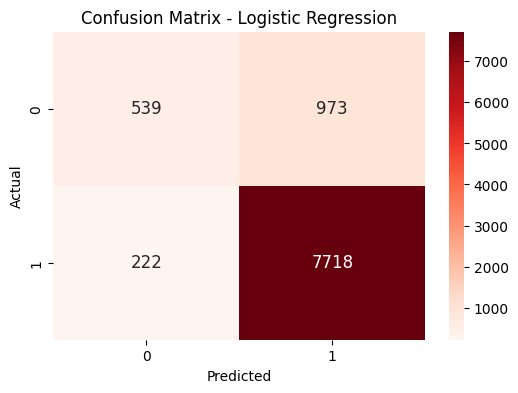

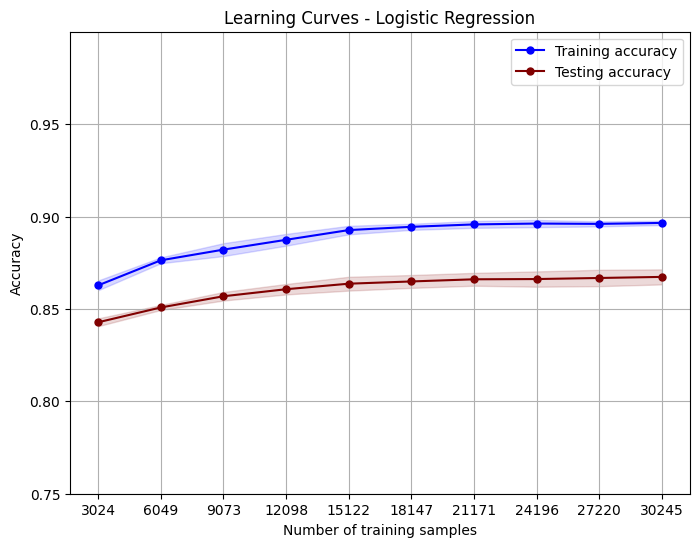

In [ ]:
def logistic_regression_model(X_train, X_test, y_train, y_test):
    name = "Logistic Regression"
    print(f"\n{name} Results:")

    # Initialize TfidfVectorizer and LogisticRegression
    tfidf = TfidfVectorizer()
    classifier = LogisticRegression(random_state=42, max_iter=10000)

    # Transform the data
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)

    # Cross-validation
    cv_scores = cross_val_score(classifier, X_train_tfidf, y_train, cv=5, scoring='accuracy')
    print("Cross-validation scores:", cv_scores)
    print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    # Fit the model
    classifier.fit(X_train_tfidf, y_train)

    # Evaluate on training and test sets
    train_score = classifier.score(X_train_tfidf, y_train)
    test_score = classifier.score(X_test_tfidf, y_test)

    print(f"Training Accuracy: {train_score:.4f}")
    print(f"Testing Accuracy: {test_score:.4f}")

    # Check for overfitting
    difference = train_score - cv_scores.mean()
    print(f"Difference in Training and Cross-validation Accuracy: {difference:.4f}")
    if difference > 0.1:
        print("Warning: Potential overfitting")
    else:
        print("No significant overfitting")

    # Classification reports
    y_train_pred = classifier.predict(X_train_tfidf)
    y_test_pred = classifier.predict(X_test_tfidf)

    print("\nTraining Classification Report:")
    print(classification_report(y_train, y_train_pred))

    print("\nTesting Classification Report:")
    print(classification_report(y_test, y_test_pred))

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', annot_kws={"fontsize":12})
    plt.xlabel('Predicted', fontsize = 10)
    plt.ylabel('Actual', fontsize = 10)
    plt.title(f'Confusion Matrix - {name}', fontsize = 12)
    plt.show()

    # Learning Curves
    train_sizes, train_scores, test_scores = learning_curve(
        classifier, X_train_tfidf, y_train, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='maroon', marker='o', markersize=5, label='Testing accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='maroon')
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curves - {name}')
    plt.legend(loc='upper right')
    plt.ylim(0.75, 1.0)
    y_ticks=np.arange(0.75, 1.0, 0.05)
    plt.yticks(y_ticks)
    plt.xticks(train_sizes)
    plt.grid(True)
    plt.show()

    return classifier, tfidf

# Assuming X_train, X_test, y_train, y_test are already defined
lr_model, lr_tfidf = logistic_regression_model(X_train, X_test, y_train, y_test)


Logistic Regression Results:
Training Accuracy: 0.8971
Testing Accuracy: 0.8736

Training Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.45      0.59      6284
           1       0.90      0.99      0.94     31523

    accuracy                           0.90     37807
   macro avg       0.88      0.72      0.77     37807
weighted avg       0.89      0.90      0.88     37807


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.36      0.47      1512
           1       0.89      0.97      0.93      7940

    accuracy                           0.87      9452
   macro avg       0.80      0.66      0.70      9452
weighted avg       0.86      0.87      0.86      9452



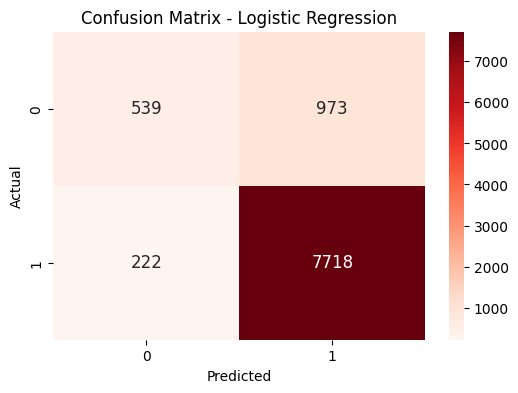


False Positives (Predicted 1, Actual 0):
       Actual  Predicted                                               Text
10338       0          1          much mean stuff could say oomf want bulli
19130       0          1                                    fuck hate class
19267       0          1                                       kat cunt mkr
37673       0          1                                 ye bless thnx tori
25688       0          1  liter million invent list like noth would inve...

False Negatives (Predicted 0, Actual 1):
       Actual  Predicted                                               Text
43375       1          0  mullah oktar liar islamofanat hate ypg secular...
4718        1          0  fan miss hotti greatfood greatcompani peteampm...
32271       1          0               cannot believ kat still competit mkr
13588       1          0                 killa model give killa dessert mkr
10905       1          0                          real shit bro miss ramdit


In [16]:
# BUILDING LOGISTIC REGRESSION ON MISCLASSIFIED INSTANCES
def random_forest_model(X_train, X_test, y_train, y_test):
    name = "Logistic Regression"
    print(f"\n{name} Results:")

    # Initialize TfidfVectorizer and LogisticRegression
    tfidf = TfidfVectorizer()
    classifier = LogisticRegression(random_state=42, max_iter=10000)

    # Transform the data
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)


    # Fit the model
    classifier.fit(X_train_tfidf, y_train)

    # Evaluate on training and test sets
    train_score = classifier.score(X_train_tfidf, y_train)
    test_score = classifier.score(X_test_tfidf, y_test)

    print(f"Training Accuracy: {train_score:.4f}")
    print(f"Testing Accuracy: {test_score:.4f}")

#
    # Classification reports
    y_train_pred = classifier.predict(X_train_tfidf)
    y_test_pred = classifier.predict(X_test_tfidf)

    print("\nTraining Classification Report:")
    print(classification_report(y_train, y_train_pred))

    print("\nTesting Classification Report:")
    print(classification_report(y_test, y_test_pred))

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', annot_kws={"fontsize":12})
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('Actual', fontsize=10)
    plt.title(f'Confusion Matrix - {name}', fontsize=12)
    plt.show()


    # Identifying and Displaying Misclassified Instances
    # Convert predictions and true labels into a DataFrame
    results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred, 'Text': X_test})

    # Filter false positives (Predicted = 1 but Actual = 0)
    false_positives = results[(results['Predicted'] == 1) & (results['Actual'] == 0)]

    # Filter false negatives (Predicted = 0 but Actual = 1)
    false_negatives = results[(results['Predicted'] == 0) & (results['Actual'] == 1)]

    # Display some of the false positives
    print("\nFalse Positives (Predicted 1, Actual 0):")
    print(false_positives.head())  # Display the first few instances

    # Display some of the false negatives
    print("\nFalse Negatives (Predicted 0, Actual 1):")
    print(false_negatives.head())  # Display the first few instances

    return classifier, tfidf

# Assuming X_train, X_test, y_train, y_test are already defined
rf_classifier, rf_tfidf = random_forest_model(X_train, X_test, y_train, y_test)


# Support Vector Machine


Support Vector Machine Results:
Cross-validation scores: [0.85665168 0.86128008 0.86258431 0.86417141 0.86086496]
Mean cross-validation accuracy: 0.8611 (+/- 0.0050)
Training Accuracy: 0.9455
Testing Accuracy: 0.8687
Difference in Training and Cross-validation Accuracy: 0.0844
No significant overfitting

Training Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.70      0.81      6284
           1       0.94      0.99      0.97     31523

    accuracy                           0.95     37807
   macro avg       0.95      0.85      0.89     37807
weighted avg       0.95      0.95      0.94     37807


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.34      0.45      1512
           1       0.89      0.97      0.93      7940

    accuracy                           0.87      9452
   macro avg       0.78      0.65      0.69      9452
weighted avg       0.85      0

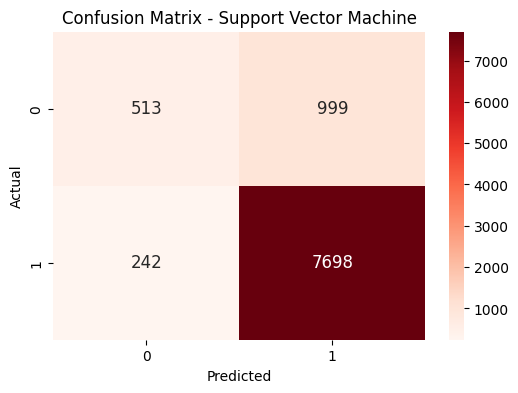

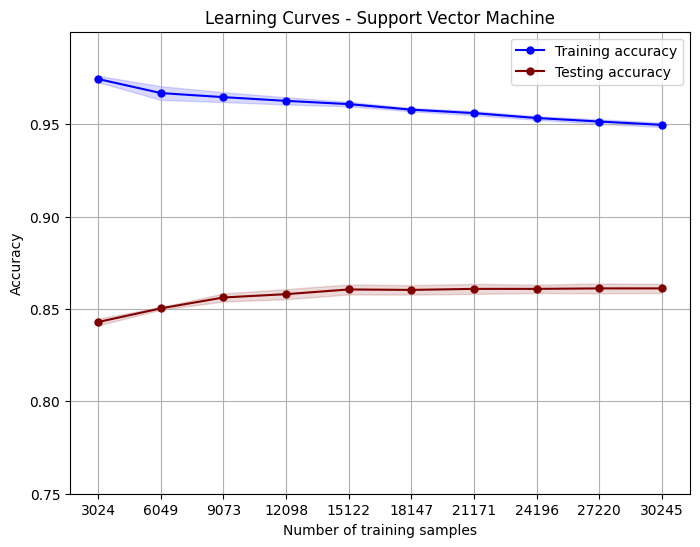

In [ ]:
def svm_model(X_train, X_test, y_train, y_test):
    name = "Support Vector Machine"
    print(f"\n{name} Results:")

    # Initialize TfidfVectorizer and SVC
    tfidf = TfidfVectorizer()
    classifier = SVC(random_state=42)

    # Transform the data
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)

    # Cross-validation
    cv_scores = cross_val_score(classifier, X_train_tfidf, y_train, cv=5, scoring='accuracy')
    print("Cross-validation scores:", cv_scores)
    print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    # Fit the model
    classifier.fit(X_train_tfidf, y_train)

    # Evaluate on training and test sets
    train_score = classifier.score(X_train_tfidf, y_train)
    test_score = classifier.score(X_test_tfidf, y_test)

    print(f"Training Accuracy: {train_score:.4f}")
    print(f"Testing Accuracy: {test_score:.4f}")

    # Check for overfitting
    difference = train_score - cv_scores.mean()
    print(f"Difference in Training and Cross-validation Accuracy: {difference:.4f}")
    if difference > 0.1:
        print("Warning: Potential overfitting")
    else:
        print("No significant overfitting")

    # Classification reports
    y_train_pred = classifier.predict(X_train_tfidf)
    y_test_pred = classifier.predict(X_test_tfidf)

    print("\nTraining Classification Report:")
    print(classification_report(y_train, y_train_pred))

    print("\nTesting Classification Report:")
    print(classification_report(y_test, y_test_pred))

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', annot_kws={"fontsize":12})
    plt.xlabel('Predicted', fontsize = 10)
    plt.ylabel('Actual', fontsize = 10)
    plt.title(f'Confusion Matrix - {name}', fontsize = 12)
    plt.show()

    # Learning Curves
    train_sizes, train_scores, test_scores = learning_curve(
        classifier, X_train_tfidf, y_train, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='maroon', marker='o', markersize=5, label='Testing accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='maroon')
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curves - {name}')
    plt.legend(loc='upper right')
    plt.ylim(0.75, 1.0)
    y_ticks=np.arange(0.75, 1.0, 0.05)
    plt.yticks(y_ticks)
    plt.xticks(train_sizes)
    plt.grid(True)
    plt.show()

    return classifier, tfidf

# Assuming X_train, X_test, y_train, y_test are already defined
svm_classifier, svm_tfidf = svm_model(X_train, X_test, y_train, y_test)

# Random Forest


Random Forest Results:
Cross-validation scores: [0.84871727 0.85017191 0.85769078 0.85623595 0.84949081]
Mean cross-validation accuracy: 0.8525 (+/- 0.0075)
Training Accuracy: 0.9726
Testing Accuracy: 0.8570
Difference in Training and Cross-validation Accuracy: 0.1201

Training Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      6284
           1       0.98      0.99      0.98     31523

    accuracy                           0.97     37807
   macro avg       0.96      0.94      0.95     37807
weighted avg       0.97      0.97      0.97     37807


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.40      0.47      1512
           1       0.89      0.94      0.92      7940

    accuracy                           0.86      9452
   macro avg       0.73      0.67      0.69      9452
weighted avg       0.84      0.86      0.85      9452



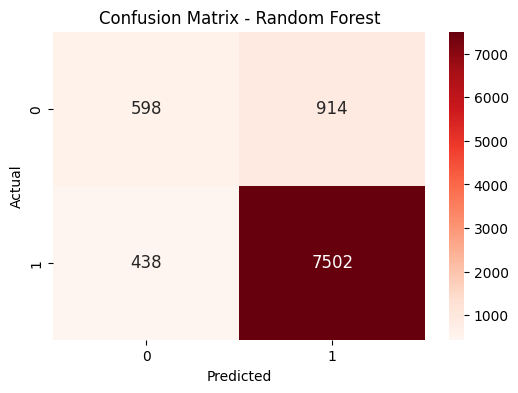

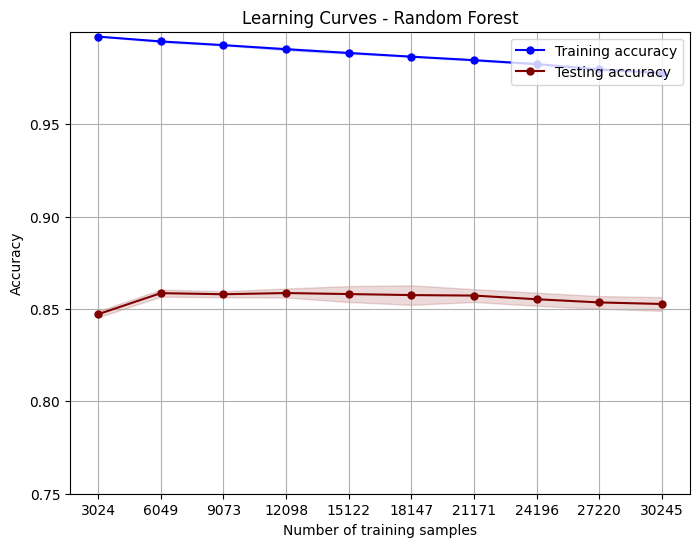

In [ ]:
# BUILDING RANDOM FOREST CLASSIFIER WITH ORIGINAL DATASET
def random_forest_model(X_train, X_test, y_train, y_test):
    name = "Random Forest"
    print(f"\n{name} Results:")

    # Initialize TfidfVectorizer and RandomForestClassifier
    tfidf = TfidfVectorizer()
    classifier = RandomForestClassifier(random_state=42)

    # Transform the data
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)

    # Cross-validation
    cv_scores = cross_val_score(classifier, X_train_tfidf, y_train, cv=5, scoring='accuracy')
    print("Cross-validation scores:", cv_scores)
    print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    # Fit the model
    classifier.fit(X_train_tfidf, y_train)

    # Evaluate on training and test sets
    train_score = classifier.score(X_train_tfidf, y_train)
    test_score = classifier.score(X_test_tfidf, y_test)

    print(f"Training Accuracy: {train_score:.4f}")
    print(f"Testing Accuracy: {test_score:.4f}")

    # Check for overfitting
    difference = train_score - cv_scores.mean()
    print(f"Difference in Training and Cross-validation Accuracy: {difference:.4f}")
    if difference > 0.1:
        print("Warning: Potential overfitting")
    else:
        print("No significant overfitting")

    # Classification reports
    y_train_pred = classifier.predict(X_train_tfidf)
    y_test_pred = classifier.predict(X_test_tfidf)

    print("\nTraining Classification Report:")
    print(classification_report(y_train, y_train_pred))

    print("\nTesting Classification Report:")
    print(classification_report(y_test, y_test_pred))

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', annot_kws={"fontsize":12})
    plt.xlabel('Predicted', fontsize = 10)
    plt.ylabel('Actual', fontsize = 10)
    plt.title(f'Confusion Matrix - {name}', fontsize = 12)
    plt.show()

    # Learning Curves
    train_sizes, train_scores, test_scores = learning_curve(
        classifier, X_train_tfidf, y_train, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='maroon', marker='o', markersize=5, label='Testing accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='maroon')
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curves - {name}')
    plt.legend(loc='upper right')
    plt.ylim(0.75, 1.0)
    y_ticks=np.arange(0.75, 1.0, 0.05)
    plt.yticks(y_ticks)
    plt.xticks(train_sizes)
    plt.grid(True)
    plt.show()

    return classifier, tfidf

# Assuming X_train, X_test, y_train, y_test are already defined
rf_classifier, rf_tfidf = random_forest_model(X_train, X_test, y_train, y_test)

### PREDICTING MISSCLASSIFIED INSTANCES


Random Forest Results:
Training Accuracy: 0.9726
Testing Accuracy: 0.8570

Training Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      6284
           1       0.98      0.99      0.98     31523

    accuracy                           0.97     37807
   macro avg       0.96      0.94      0.95     37807
weighted avg       0.97      0.97      0.97     37807


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.40      0.47      1512
           1       0.89      0.94      0.92      7940

    accuracy                           0.86      9452
   macro avg       0.73      0.67      0.69      9452
weighted avg       0.84      0.86      0.85      9452



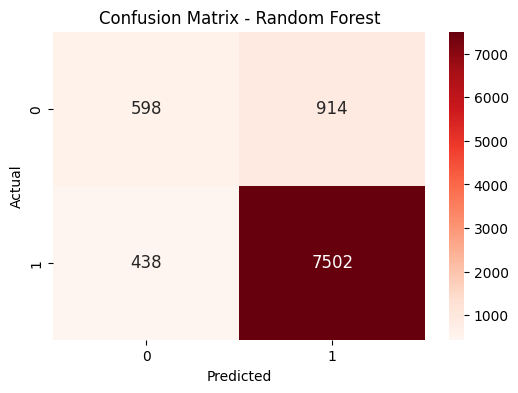


False Positives (Predicted 1, Actual 0):
       Actual  Predicted                                               Text
10338       0          1          much mean stuff could say oomf want bulli
19130       0          1                                    fuck hate class
19267       0          1                                       kat cunt mkr
37673       0          1                                 ye bless thnx tori
25688       0          1  liter million invent list like noth would inve...

False Negatives (Predicted 0, Actual 1):
       Actual  Predicted                                               Text
10748       1          0      talk twitter week ago talk month ago neener p
12965       1          0                      told pretti good drum suspens
1926        1          0  would happi get adult leo would adjust well th...
4718        1          0  fan miss hotti greatfood greatcompani peteampm...
32271       1          0               cannot believ kat still competit mkr


In [15]:
# BUILDING RANDOM FOREST ON MISCLASSIFIED INSTANCES
def random_forest_model(X_train, X_test, y_train, y_test):
    name = "Random Forest"
    print(f"\n{name} Results:")

    # Initialize TfidfVectorizer and RandomForestClassifier
    tfidf = TfidfVectorizer()
    classifier = RandomForestClassifier(random_state=42)

    # Transform the data
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)


    # Fit the model
    classifier.fit(X_train_tfidf, y_train)

    # Evaluate on training and test sets
    train_score = classifier.score(X_train_tfidf, y_train)
    test_score = classifier.score(X_test_tfidf, y_test)

    print(f"Training Accuracy: {train_score:.4f}")
    print(f"Testing Accuracy: {test_score:.4f}")

#
    # Classification reports
    y_train_pred = classifier.predict(X_train_tfidf)
    y_test_pred = classifier.predict(X_test_tfidf)

    print("\nTraining Classification Report:")
    print(classification_report(y_train, y_train_pred))

    print("\nTesting Classification Report:")
    print(classification_report(y_test, y_test_pred))

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', annot_kws={"fontsize":12})
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('Actual', fontsize=10)
    plt.title(f'Confusion Matrix - {name}', fontsize=12)
    plt.show()


    # Identifying and Displaying Misclassified Instances
    # Convert predictions and true labels into a DataFrame
    results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred, 'Text': X_test})

    # Filter false positives (Predicted = 1 but Actual = 0)
    false_positives = results[(results['Predicted'] == 1) & (results['Actual'] == 0)]

    # Filter false negatives (Predicted = 0 but Actual = 1)
    false_negatives = results[(results['Predicted'] == 0) & (results['Actual'] == 1)]

    # Display some of the false positives
    print("\nFalse Positives (Predicted 1, Actual 0):")
    print(false_positives.head())  # Display the first few instances

    # Display some of the false negatives
    print("\nFalse Negatives (Predicted 0, Actual 1):")
    print(false_negatives.head())  # Display the first few instances

    return classifier, tfidf

# Assuming X_train, X_test, y_train, y_test are already defined
rf_classifier, rf_tfidf = random_forest_model(X_train, X_test, y_train, y_test)


# Applying SMOTE Technique

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [ ]:
# Assuming df_shuffled is your DataFrame
X = df_shuffled['df_cleaned']
y = df_shuffled['class']

# Original class distribution
original_distribution = Counter(y)
print("Original class distribution:", original_distribution)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_vectorized, y)

# New class distribution
new_distribution = Counter(y_resampled)
print("New class distribution:", new_distribution)

# Calculate percentage increase for the minority class
#minority_class = min(original_distribution, key=original_distribution.get)
#original_count = original_distribution[minority_class]
#new_count = new_distribution[minority_class]
#percentage_increase = ((new_count - original_count) / original_count) * 100

#print(f"Percentage increase in minority class: {percentage_increase:.2f}%")

Original class distribution: Counter({1: 39463, 0: 7796})
New class distribution: Counter({1: 39463, 0: 39463})


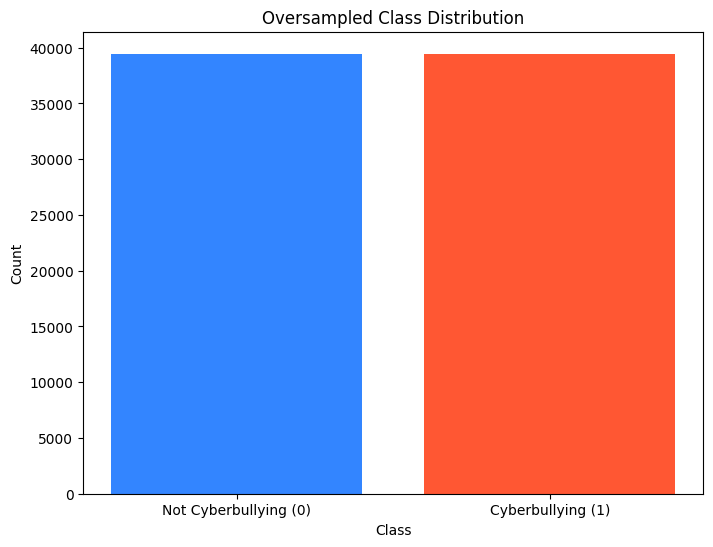

In [ ]:
# Distribution of Resampled Data
plt.figure(figsize=(8, 6))
plt.bar(new_distribution.keys(), new_distribution.values(), color=['#FF5733', '#3385FF'])
plt.title("Oversampled Class Distribution")
plt.xlabel('Class', fontsize=10)
plt.ylabel("Count")
plt.xticks([0, 1])
plt.gca().set_xticklabels(['Not Cyberbullying (0)', 'Cyberbullying (1)'])
plt.show()

# Applying SMOTE on ML Models

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

Logistic Regression

Cross-validation scores: [0.83156225 0.89602665 0.89896106 0.90022999 0.88674756]
Mean cross-validation accuracy: 0.8827 (+/- 0.0520)
Training Accuracy: 0.9051
Testing Accuracy: 0.8285
Difference in Training and Cross-validation Accuracy: 0.0224
No significant overfitting

Training Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     31523
           1       0.95      0.86      0.90     31523

    accuracy                           0.91     63046
   macro avg       0.91      0.91      0.90     63046
weighted avg       0.91      0.91      0.90     63046


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.74      0.58      1512
           1       0.95      0.84      0.89      7940

    accuracy                           0.83      9452
   macro avg       0.71      0.79      0.74      9452
weighted avg       0.87      0.83      0.84      9452



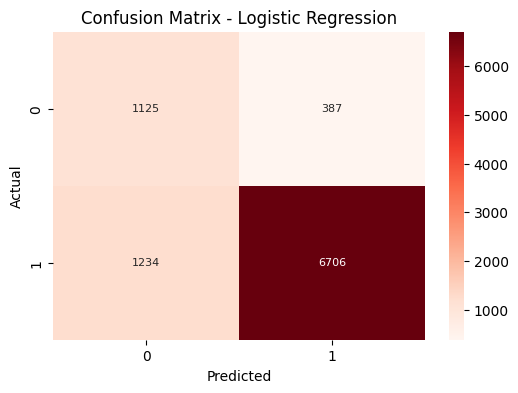

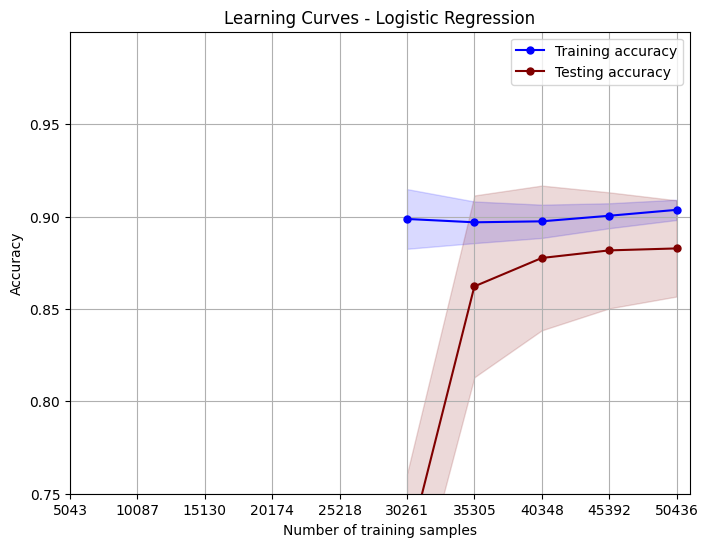

In [ ]:
# Assuming df_shuffled is your DataFrame
X = df_shuffled['df_cleaned']
y = df_shuffled['class']

# Split the data first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_vectorized = vectorizer.transform(X_test)

# Now apply SMOTE to the vectorized training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vectorized, y_train)

# Create and train the Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=10000)

# Cross-validation
cv_scores = cross_val_score(lr_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Fit the model
lr_model.fit(X_train_resampled, y_train_resampled)

# Evaluate on training and test sets
train_score = lr_model.score(X_train_resampled, y_train_resampled)
test_score = lr_model.score(X_test_vectorized, y_test)

print(f"Training Accuracy: {train_score:.4f}")
print(f"Testing Accuracy: {test_score:.4f}")

# Check for overfitting
difference = train_score - cv_scores.mean()
print(f"Difference in Training and Cross-validation Accuracy: {difference:.4f}")
if difference > 0.1:
    print("Warning: Potential overfitting")
else:
    print("No significant overfitting")

# Classification reports
y_train_pred = lr_model.predict(X_train_resampled)
y_test_pred = lr_model.predict(X_test_vectorized)

print("\nTraining Classification Report:")
print(classification_report(y_train_resampled, y_train_pred))

print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', annot_kws={"fontsize":8})
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('Confusion Matrix - Logistic Regression', fontsize = 12)
plt.show()

# Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    lr_model, X_train_resampled, y_train_resampled, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='maroon', marker='o', markersize=5, label='Testing accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='maroon')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning Curves - Logistic Regression')
plt.legend(loc='upper right')
plt.ylim(0.75, 1.0)
plt.yticks(np.arange(0.75, 1.0, 0.05))
plt.xticks(train_sizes)
plt.grid(True)
plt.show()

Cross-validation scores: [0.83156225 0.89602665 0.89896106 0.90022999 0.88674756]
Mean cross-validation accuracy: 0.8827 (+/- 0.0520)
Training Accuracy: 0.9051
Testing Accuracy: 0.8285
Difference in Training and Cross-validation Accuracy: 0.0224
No significant overfitting

Training Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     31523
           1       0.95      0.86      0.90     31523

    accuracy                           0.91     63046
   macro avg       0.91      0.91      0.90     63046
weighted avg       0.91      0.91      0.90     63046


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.74      0.58      1512
           1       0.95      0.84      0.89      7940

    accuracy                           0.83      9452
   macro avg       0.71      0.79      0.74      9452
weighted avg       0.87      0.83      0.84      9452



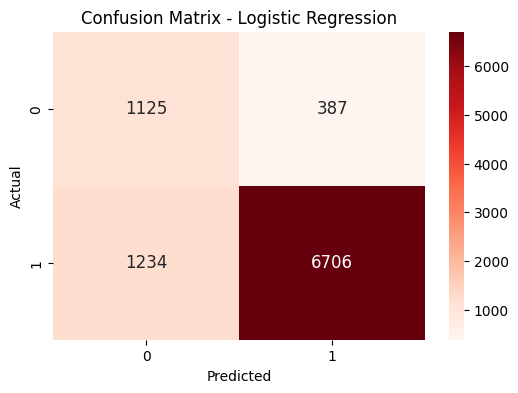

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Assuming df_shuffled is your DataFrame
X = df_shuffled['df_cleaned']
y = df_shuffled['class']

# Split the data first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_vectorized = vectorizer.transform(X_test)

# Now apply SMOTE to the vectorized training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vectorized, y_train)

# Create and train the Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=10000)

# Cross-validation
cv_scores = cross_val_score(lr_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Fit the model
lr_model.fit(X_train_resampled, y_train_resampled)

# Evaluate on training and test sets
train_score = lr_model.score(X_train_resampled, y_train_resampled)
test_score = lr_model.score(X_test_vectorized, y_test)

print(f"Training Accuracy: {train_score:.4f}")
print(f"Testing Accuracy: {test_score:.4f}")

# Check for overfitting
difference = train_score - cv_scores.mean()
print(f"Difference in Training and Cross-validation Accuracy: {difference:.4f}")
if difference > 0.1:
    print("Warning: Potential overfitting")
else:
    print("No significant overfitting")

# Classification reports
y_train_pred = lr_model.predict(X_train_resampled)
y_test_pred = lr_model.predict(X_test_vectorized)

print("\nTraining Classification Report:")
print(classification_report(y_train_resampled, y_train_pred))

print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', annot_kws={"fontsize":12})
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('Confusion Matrix - Logistic Regression', fontsize = 12)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training Accuracy: 0.9312
Testing Accuracy: 0.8283

Training Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     31570
           1       0.96      0.90      0.93     31570

    accuracy                           0.93     63140
   macro avg       0.93      0.93      0.93     63140
weighted avg       0.93      0.93      0.93     63140


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.70      0.57      1559
           1       0.94      0.85      0.89      7893

    accuracy                           0.83      9452
   macro avg       0.71      0.78      0.73      9452
weighted avg       0.86      0.83      0.84      9452



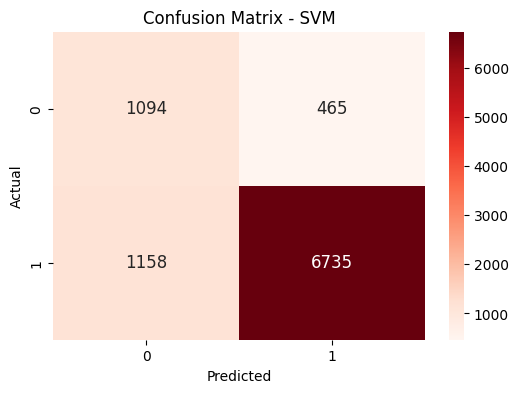

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
from imblearn.over_sampling import SMOTE

# Assuming df_shuffled is your DataFrame
X = df_shuffled['df_cleaned']
y = df_shuffled['class']

# Split the data first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_vectorized = vectorizer.transform(X_test)

# Now apply SMOTE to the vectorized training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vectorized, y_train)

# Create and train the SVM model
svm_model = SVC(kernel='linear', random_state=42, probability=True, max_iter=20000)

# Cross-validation
#cv_scores = cross_val_score(svm_model, X_train_resampled, y_train_resampled, cv=3, scoring='accuracy')
#print("Cross-validation scores:", cv_scores)
#print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Fit the model
svm_model.fit(X_train_resampled, y_train_resampled)

# Evaluate on training and test sets
y_train_pred = svm_model.predict(X_train_resampled)
y_test_pred = svm_model.predict(X_test_vectorized)

train_score = accuracy_score(y_train_resampled, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_score:.4f}")
print(f"Testing Accuracy: {test_score:.4f}")

# Check for overfitting
#difference = train_score - cv_scores.mean()
#print(f"Difference in Training and Cross-validation Accuracy: {difference:.4f}")
#if difference > 0.1:
 #   print("Warning: Potential overfitting")
#else:
 #   print("No significant overfitting")

# Classification reports
print("\nTraining Classification Report:")
print(classification_report(y_train_resampled, y_train_pred))

print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', annot_kws={"fontsize":12})
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('Confusion Matrix - SVM', fontsize = 12)
plt.show()

# Learning Curves
#train_sizes, train_scores, test_scores = learning_curve(
 #   svm_model, X_train_resampled, y_train_resampled, cv=5, n_jobs=-1,
  #  train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
#)

#train_mean = np.mean(train_scores, axis=1)
#train_std = np.std(train_scores, axis=1)
#test_mean = np.mean(test_scores, axis=1)
#test_std = np.std(test_scores, axis=1)

#plt.figure(figsize=(8, 6))
#plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
#plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
#plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-validation accuracy')
#plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
#plt.xlabel('Number of training samples')
#plt.ylabel('Balanced Accuracy')
#plt.title('Learning Curves - SVM')
#plt.legend(loc='lower right')
#plt.ylim(0.5, 1.0)
#plt.yticks(np.arange(0.5, 1.05, 0.05))
#plt.xticks(train_sizes)
#plt.grid(True)
#plt.show()

Cross-validation scores: [0.8517843  0.92957411 0.93108097 0.93108097 0.92513284]
Mean cross-validation accuracy: 0.9137 (+/- 0.0621)
Training Accuracy: 0.9828
Testing Accuracy: 0.8357
Difference in Training and Cross-validation Accuracy: 0.0691
No significant overfitting

Training Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     31523
           1       0.99      0.97      0.98     31523

    accuracy                           0.98     63046
   macro avg       0.98      0.98      0.98     63046
weighted avg       0.98      0.98      0.98     63046


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.58      0.53      1512
           1       0.92      0.88      0.90      7940

    accuracy                           0.84      9452
   macro avg       0.70      0.73      0.72      9452
weighted avg       0.85      0.84      0.84      9452



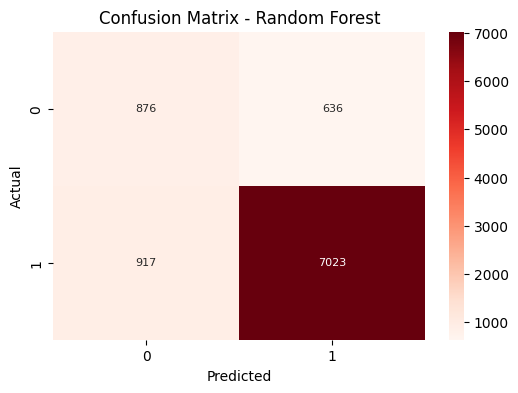

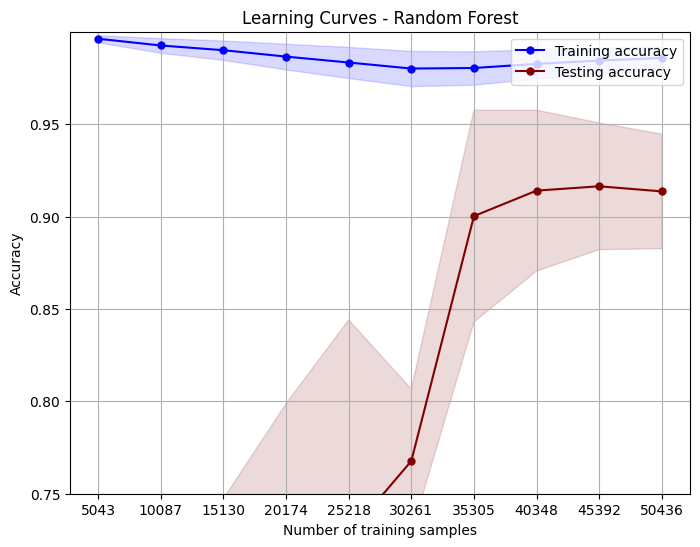

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Assuming df_shuffled is your DataFrame
X = df_shuffled['df_cleaned']
y = df_shuffled['class']

# Split the data first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_vectorized = vectorizer.transform(X_test)

# Now apply SMOTE to the vectorized training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vectorized, y_train)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Cross-validation
cv_scores = cross_val_score(rf_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Fit the model
rf_model.fit(X_train_resampled, y_train_resampled)

# Evaluate on training and test sets
train_score = rf_model.score(X_train_resampled, y_train_resampled)
test_score = rf_model.score(X_test_vectorized, y_test)

print(f"Training Accuracy: {train_score:.4f}")
print(f"Testing Accuracy: {test_score:.4f}")

# Check for overfitting
difference = train_score - cv_scores.mean()
print(f"Difference in Training and Cross-validation Accuracy: {difference:.4f}")
if difference > 0.1:
    print("Warning: Potential overfitting")
else:
    print("No significant overfitting")

# Classification reports
y_train_pred = rf_model.predict(X_train_resampled)
y_test_pred = rf_model.predict(X_test_vectorized)

print("\nTraining Classification Report:")
print(classification_report(y_train_resampled, y_train_pred))

print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', annot_kws={"fontsize":12})
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual', fontsize=10)
plt.title('Confusion Matrix - Random Forest', fontsize=12)
plt.show()

# Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train_resampled, y_train_resampled, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='maroon', marker='o', markersize=5, label='Testing accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='maroon')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning Curves - Random Forest')
plt.legend(loc='upper right')
plt.ylim(0.75, 1.0)
plt.yticks(np.arange(0.75, 1.0, 0.05))
plt.xticks(train_sizes)
plt.grid(True)
plt.show()

Cross-validation scores: [0.8517843  0.92957411 0.93108097 0.93108097 0.92513284]
Mean cross-validation accuracy: 0.9137 (+/- 0.0621)
Training Accuracy: 0.9828
Testing Accuracy: 0.8357
Difference in Training and Cross-validation Accuracy: 0.0691
No significant overfitting

Training Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     31523
           1       0.99      0.97      0.98     31523

    accuracy                           0.98     63046
   macro avg       0.98      0.98      0.98     63046
weighted avg       0.98      0.98      0.98     63046


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.58      0.53      1512
           1       0.92      0.88      0.90      7940

    accuracy                           0.84      9452
   macro avg       0.70      0.73      0.72      9452
weighted avg       0.85      0.84      0.84      9452



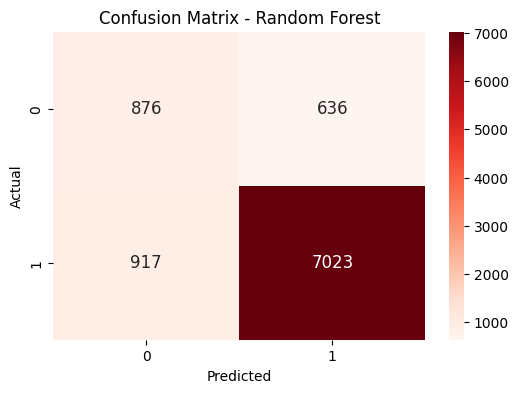

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Assuming df_shuffled is your DataFrame
X = df_shuffled['df_cleaned']
y = df_shuffled['class']

# Split the data first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_vectorized = vectorizer.transform(X_test)

# Now apply SMOTE to the vectorized training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vectorized, y_train)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Cross-validation
cv_scores = cross_val_score(rf_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Fit the model
rf_model.fit(X_train_resampled, y_train_resampled)

# Evaluate on training and test sets
train_score = rf_model.score(X_train_resampled, y_train_resampled)
test_score = rf_model.score(X_test_vectorized, y_test)

print(f"Training Accuracy: {train_score:.4f}")
print(f"Testing Accuracy: {test_score:.4f}")

# Check for overfitting
difference = train_score - cv_scores.mean()
print(f"Difference in Training and Cross-validation Accuracy: {difference:.4f}")
if difference > 0.1:
    print("Warning: Potential overfitting")
else:
    print("No significant overfitting")

# Classification reports
y_train_pred = rf_model.predict(X_train_resampled)
y_test_pred = rf_model.predict(X_test_vectorized)

print("\nTraining Classification Report:")
print(classification_report(y_train_resampled, y_train_pred))

print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', annot_kws={"fontsize":12})
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual', fontsize=10)
plt.title('Confusion Matrix - Random Forest', fontsize=12)
plt.show()



# Hyperparameter Tuning Using Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

Logistic Regrssion with different parameters


Logistic Regression Results:
Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation accuracy: 0.8691
Training Accuracy: 0.8810
Testing Accuracy: 0.8763

Training Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.38      0.51      6284
           1       0.89      0.98      0.93     31523

    accuracy                           0.88     37807
   macro avg       0.84      0.68      0.72     37807
weighted avg       0.87      0.88      0.86     37807


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.36      0.48      1512
           1       0.89      0.98      0.93      7940

    accuracy                           0.88      9452
   macro avg       0.81      0.67      0.71      9452
weighted avg       0.86      0.88      0.86      9452



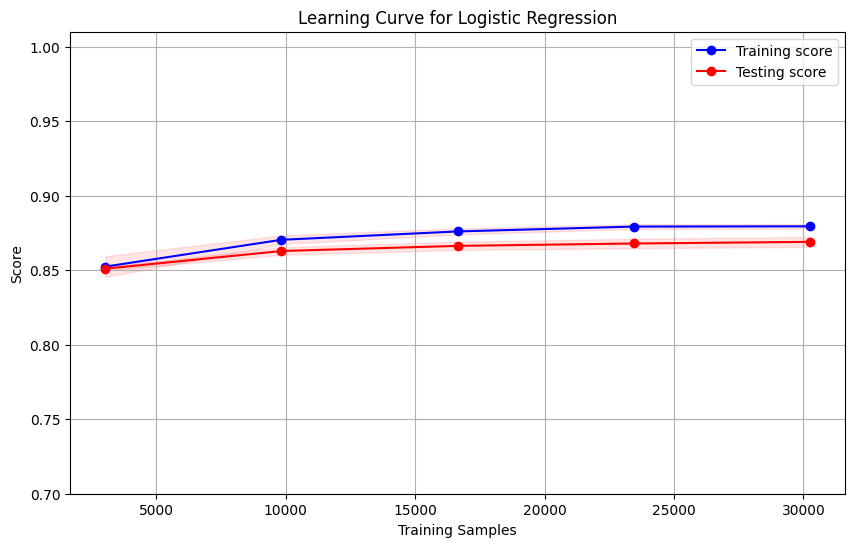

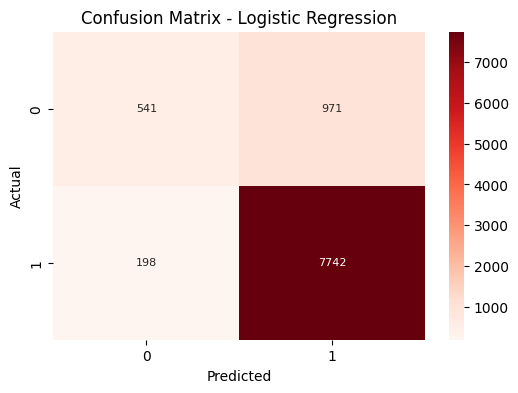

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Samples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Testing score")
    plt.legend(loc="best")
    return plt

def model_selection(X_train, X_test, y_train, y_test):
    name = "Logistic Regression"
    print(f"\n{name} Results:")

    # Define the model and parameter grid
    model = LogisticRegression(random_state=42)
    param_grid = {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2', 'none'],
        'solver': ['saga']
    }

    # Perform GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print("Best parameters:", grid_search.best_params_)
    print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

    # Use the best model for evaluation
    best_model = grid_search.best_estimator_

    # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)

    print(f"Training Accuracy: {train_score:.4f}")
    print(f"Testing Accuracy: {test_score:.4f}")

    # Check for overfitting
    #difference = train_score - grid_search.best_score_
    #print(f"Difference in Training and Cross-validation Accuracy: {difference:.4f}")
    #if difference > 0.1:
     #   print("Warning: Potential overfitting")
    #else:
     #   print("No significant overfitting")

    # Classification reports
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    print("\nTraining Classification Report:")
    print(classification_report(y_train, y_train_pred))

    print("\nTesting Classification Report:")
    print(classification_report(y_test, y_test_pred))

    # Plot learning curve
    plot_learning_curve(best_model, "Learning Curve for Logistic Regression",
                        X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)
    plt.show()

     # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', annot_kws={"fontsize":8})
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('Actual', fontsize=10)
    plt.title('Confusion Matrix - Logistic Regression', fontsize=12)
    plt.show()

    return best_model

# Call the model selection function with vectorized data
best_lr_model = model_selection(X_train_vectorized, X_test_vectorized, y_train, y_test)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

def model_selection(X_train, X_test, y_train, y_test):
    name = "Logistic Regression"
    print(f"\n{name} Results:")

    # Define the model and parameter grid
    model = LogisticRegression(random_state=42)
    param_grid = {
        'C': [0.1, 1, 10],
        'penalty': ['l1'],
        'solver': ['liblinear']
    }

    # Perform GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print("Best parameters:", grid_search.best_params_)
    print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

    # Use the best model for evaluation
    best_model = grid_search.best_estimator_

    # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)

    print(f"Training Accuracy: {train_score:.4f}")
    print(f"Testing Accuracy: {test_score:.4f}")

    # Check for overfitting
    difference = train_score - grid_search.best_score_
    print(f"Difference in Training and Cross-validation Accuracy: {difference:.4f}")
    if difference > 0.1:
        print("Warning: Potential overfitting")
    else:
        print("No significant overfitting")

    # Classification reports
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    print("\nTraining Classification Report:")
    print(classification_report(y_train, y_train_pred))

    print("\nTesting Classification Report:")
    print(classification_report(y_test, y_test_pred))

     # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)


    return best_model

# Call the model selection function with vectorized data
best_lr_model = model_selection(X_train_vectorized, X_test_vectorized, y_train, y_test)


Logistic Regression Results:
Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.8691
Training Accuracy: 0.8810
Testing Accuracy: 0.8763
Difference in Training and Cross-validation Accuracy: 0.0119
No significant overfitting

Training Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.38      0.51      6284
           1       0.89      0.98      0.93     31523

    accuracy                           0.88     37807
   macro avg       0.84      0.68      0.72     37807
weighted avg       0.87      0.88      0.86     37807


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.36      0.48      1512
           1       0.89      0.98      0.93      7940

    accuracy                           0.88      9452
   macro avg       0.81      0.67      0.71      9452
weighted avg       0.86      0.88      0.86      9452



Support Vector Machine

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df_shuffled is your DataFrame
X = df_shuffled['df_cleaned']
y = df_shuffled['class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

def model_selection(X_train, X_test, y_train, y_test):
    name = "Support Vector Machine"
    print(f"\n{name} Results:")

    # Define the SVM model and parameter grid
    model = SVC(random_state=42)
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
        'gamma': ['scale', 'auto']  # Only relevant for non-linear kernels like 'rbf'
    }

    # Perform GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print("Best parameters:", grid_search.best_params_)
    print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

    # Use the best model for evaluation
    best_model = grid_search.best_estimator_

    # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)

    print(f"Training Accuracy: {train_score:.4f}")
    print(f"Testing Accuracy: {test_score:.4f}")

    # Check for overfitting
    difference = train_score - grid_search.best_score_
    print(f"Difference in Training and Cross-validation Accuracy: {difference:.4f}")
    if difference > 0.1:
        print("Warning: Potential overfitting")
    else:
        print("No significant overfitting")

    # Classification reports
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    print("\nTraining Classification Report:")
    print(classification_report(y_train, y_train_pred))

    print("\nTesting Classification Report:")
    print(classification_report(y_test, y_test_pred))

    return best_model

# Call the model selection function with vectorized data
best_svm_model = model_selection(X_train_vectorized, X_test_vectorized, y_train, y_test)



Support Vector Machine Results:
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}
Best cross-validation accuracy: 0.8706
Training Accuracy: 0.8941
Testing Accuracy: 0.8734
Difference in Training and Cross-validation Accuracy: 0.0235
No significant overfitting

Training Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.48      0.60      6284
           1       0.90      0.98      0.94     31523

    accuracy                           0.89     37807
   macro avg       0.85      0.73      0.77     37807
weighted avg       0.89      0.89      0.88     37807


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.39      0.50      1512
           1       0.89      0.97      0.93      7940

    accuracy                           0.87      9452
   macro avg       0.79      0.68      0.71      9452
weighted avg       0.86      0.87      0.86      9452



Random Forest


Random Forest Results:
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy: 0.8638
Training Accuracy: 0.9001
Testing Accuracy: 0.8703
Difference in Training and Cross-validation Accuracy: 0.0363
No significant overfitting

Training Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.47      0.61      6284
           1       0.90      0.99      0.94     31523

    accuracy                           0.90     37807
   macro avg       0.88      0.73      0.78     37807
weighted avg       0.90      0.90      0.89     37807


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.34      0.45      1512
           1       0.88      0.97      0.93      7940

    accuracy                           0.87      9452
   macro avg       0.79      0.65      0.69      9452
weighted avg       0.85      

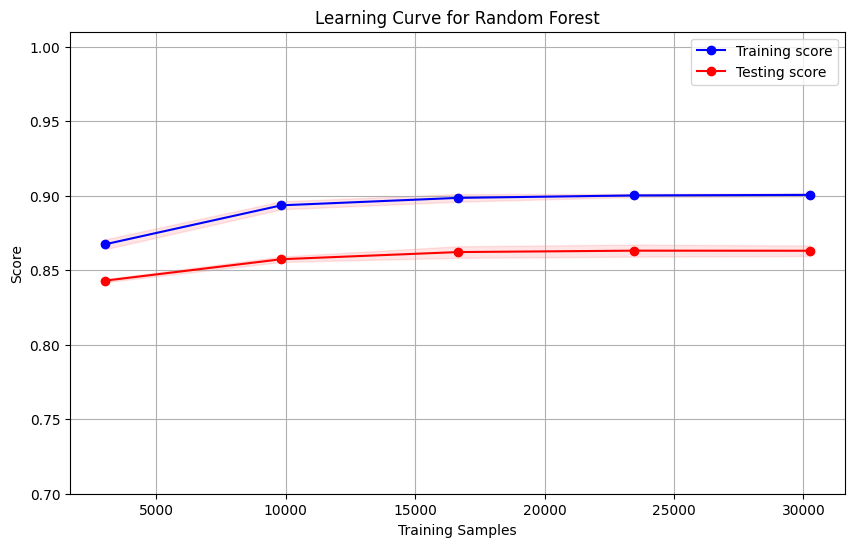

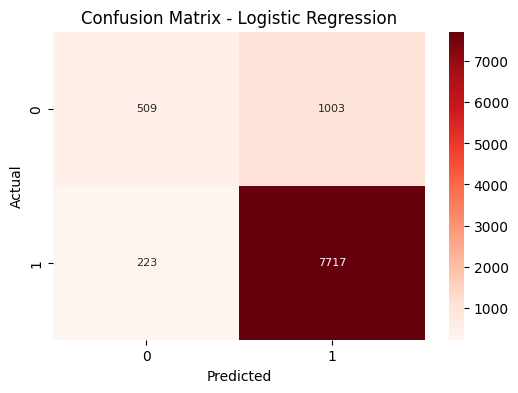

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df_shuffled is your DataFrame
X = df_shuffled['df_cleaned']
y = df_shuffled['class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Samples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Testing score")
    plt.legend(loc="best")
    return plt


def model_selection(X_train, X_test, y_train, y_test):
    name = "Random Forest"
    print(f"\n{name} Results:")

    # Define the Random Forest model and parameter grid
    model = RandomForestClassifier(random_state=42)
    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Perform GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print("Best parameters:", grid_search.best_params_)
    print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

    # Use the best model for evaluation
    best_model = grid_search.best_estimator_

    # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)

    print(f"Training Accuracy: {train_score:.4f}")
    print(f"Testing Accuracy: {test_score:.4f}")

    # Check for overfitting
    difference = train_score - grid_search.best_score_
    print(f"Difference in Training and Cross-validation Accuracy: {difference:.4f}")
    if difference > 0.1:
        print("Warning: Potential overfitting")
    else:
        print("No significant overfitting")

    # Classification reports
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    print("\nTraining Classification Report:")
    print(classification_report(y_train, y_train_pred))

    print("\nTesting Classification Report:")
    print(classification_report(y_test, y_test_pred))

     # Plot learning curve
    plot_learning_curve(best_model, "Learning Curve for Random Forest",
                        X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)
    plt.show()

        # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)

     # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', annot_kws={"fontsize":8})
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('Actual', fontsize=10)
    plt.title('Confusion Matrix - Logistic Regression', fontsize=12)
    plt.show()

    return best_model

# Call the model selection function with vectorized data
best_rf_model = model_selection(X_train_vectorized, X_test_vectorized, y_train, y_test)


Random Forest Results:
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy: 0.8638
Training Accuracy: 0.9001
Testing Accuracy: 0.8703
Difference in Training and Cross-validation Accuracy: 0.0363
No significant overfitting

Training Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.47      0.61      6284
           1       0.90      0.99      0.94     31523

    accuracy                           0.90     37807
   macro avg       0.88      0.73      0.78     37807
weighted avg       0.90      0.90      0.89     37807


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.34      0.45      1512
           1       0.88      0.97      0.93      7940

    accuracy                           0.87      9452
   macro avg       0.79      0.65      0.69      9452
weighted avg       0.85      

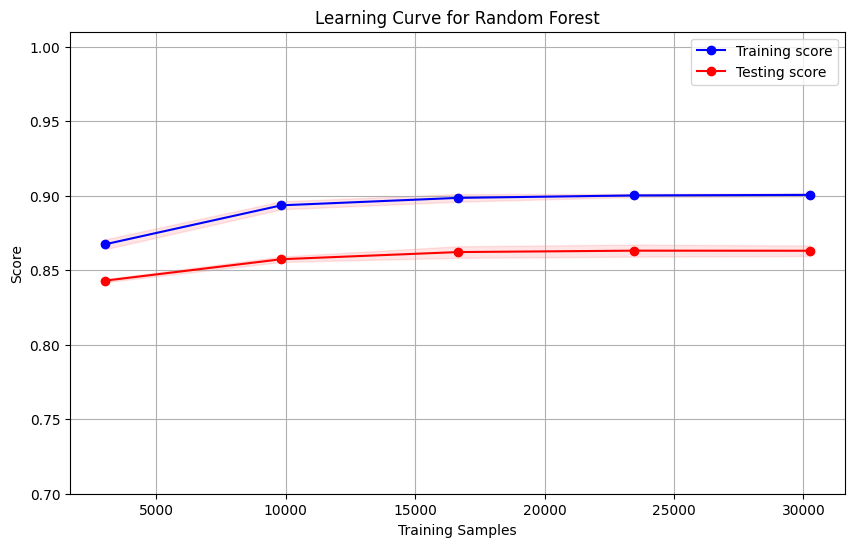

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df_shuffled is your DataFrame
X = df_shuffled['df_cleaned']
y = df_shuffled['class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Samples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Testing score")
    plt.legend(loc="best")
    return plt


def model_selection(X_train, X_test, y_train, y_test):
    name = "Random Forest"
    print(f"\n{name} Results:")

    # Define the Random Forest model and parameter grid
    model = RandomForestClassifier(random_state=42)
    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Perform GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print("Best parameters:", grid_search.best_params_)
    print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

    # Use the best model for evaluation
    best_model = grid_search.best_estimator_

    # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)

    print(f"Training Accuracy: {train_score:.4f}")
    print(f"Testing Accuracy: {test_score:.4f}")

    # Check for overfitting
    difference = train_score - grid_search.best_score_
    print(f"Difference in Training and Cross-validation Accuracy: {difference:.4f}")
    if difference > 0.1:
        print("Warning: Potential overfitting")
    else:
        print("No significant overfitting")

    # Classification reports
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    print("\nTraining Classification Report:")
    print(classification_report(y_train, y_train_pred))

    print("\nTesting Classification Report:")
    print(classification_report(y_test, y_test_pred))

     # Plot learning curve
    plot_learning_curve(best_model, "Learning Curve for Random Forest",
                        X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)
    plt.show()

    return best_model

# Call the model selection function with vectorized data
best_rf_model = model_selection(X_train_vectorized, X_test_vectorized, y_train, y_test)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df_shuffled is your DataFrame
X = df_shuffled['df_cleaned']
y = df_shuffled['class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

def model_selection(X_train, X_test, y_train, y_test):
    name = "Random Forest"
    print(f"\n{name} Results:")

    # Define the Random Forest model and parameter grid
    model = RandomForestClassifier(random_state=42)
    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Perform GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print("Best parameters:", grid_search.best_params_)
    print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

    # Use the best model for evaluation
    best_model = grid_search.best_estimator_

    # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)

    print(f"Training Accuracy: {train_score:.4f}")
    print(f"Testing Accuracy: {test_score:.4f}")

    # Check for overfitting
    difference = train_score - grid_search.best_score_
    print(f"Difference in Training and Cross-validation Accuracy: {difference:.4f}")
    if difference > 0.1:
        print("Warning: Potential overfitting")
    else:
        print("No significant overfitting")

    # Classification reports
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    print("\nTraining Classification Report:")
    print(classification_report(y_train, y_train_pred))

    print("\nTesting Classification Report:")
    print(classification_report(y_test, y_test_pred))

    return best_model

# Call the model selection function with vectorized data
best_rf_model = model_selection(X_train_vectorized, X_test_vectorized, y_train, y_test)


Random Forest Results:
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy: 0.8638
Training Accuracy: 0.9001
Testing Accuracy: 0.8703
Difference in Training and Cross-validation Accuracy: 0.0363
No significant overfitting

Training Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.47      0.61      6284
           1       0.90      0.99      0.94     31523

    accuracy                           0.90     37807
   macro avg       0.88      0.73      0.78     37807
weighted avg       0.90      0.90      0.89     37807


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.34      0.45      1512
           1       0.88      0.97      0.93      7940

    accuracy                           0.87      9452
   macro avg       0.79      0.65      0.69      9452
weighted avg       0.85      

In [ ]:
# Define models and their respective parameter grids
#models = [
 #   (LogisticRegression(random_state=42), 'Logistic Regression', {
  #      'C': [0.1, 1, 10],
   #     'penalty': ['l1', 'none'],
    #    'solver': ['sag', 'saga', 'lbfgs', 'newton-cg']
  #  }),
   # (SVC(random_state=42), 'Support Vector Machine', {
    #    'C': [0.1, 1, 10],
     #   'kernel': ['linear', 'rbf', 'poly',  'sigmoid'],
      #  'gamma': ['scale', 'auto']
   # }),
   # (RandomForestClassifier(random_state=42), 'Random Forest', {
    #    'n_estimators': [50, 100, 200, 300],
     #   'max_depth': [None, 1 to 20],
      #  'min_samples_split': [2, 5, 10, 20, 50]
  #  })
#]

In [ ]:
#!wget http://nlp.stanford.edu/data/glove.twitter.27B.zip
#!unzip glove.twitter.27B.zip

In [ ]:
#from tqdm import tqdm
#from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
#def load_glove_embeddings(file_path, embedding_dim):
 #   print(f"Loading GloVe embeddings ({embedding_dim}d)...")
  #  embeddings_dict = {}
   # with open(file_path, 'r', encoding='utf-8') as f:
    #    for line in tqdm(f, desc="Loading GloVe"):
     #       values = line.split()
      #      word = values[0]
       #     vector = np.asarray(values[1:], dtype='float32')
        #    embeddings_dict[word] = vector
   # return embeddings_dict

# Load the embeddings (choose one of these)
#glove_50d = load_glove_embeddings('glove.twitter.27B.50d.txt', 50)
#glove_100d = load_glove_embeddings('glove.twitter.27B.100d.txt', 100)
#glove_200d = load_glove_embeddings('glove.twitter.27B.200d.txt', 200)

#glove_file = '/content/glove.twitter.27B.100d.txt'
#embedding_dim = 100
#glove_dict = load_glove_embeddings(glove_file, embedding_dim)

In [ ]:
#from sklearn.base import BaseEstimator, TransformerMixin

#class GloVeVectorizer(BaseEstimator, TransformerMixin):
 #   def __init__(self, glove_dict, embedding_dim):
  #      self.glove_dict = glove_dict
   #     self.embedding_dim = embedding_dim

#    def fit(self, X, y=None):
 #       return self

   # def transform(self, X):
    #    return np.array([
     #       np.mean([self.glove_dict.get(word, np.zeros(self.embedding_dim))
      #               for word in text.split()
       #              if word in self.glove_dict]
        #            or [np.zeros(self.embedding_dim)], axis=0)
         #   for text in X
      #  ])

In [ ]:
#def model_selection(model, name, X_train, X_test, y_train, y_test, glove_dict, embedding_dim):
 #   pipeline = Pipeline([
  #      ('glove', GloVeVectorizer(glove_dict, embedding_dim)),
   #     ('classifier', model)
    #])

    #print(f"\n{name} Results:")

    #if isinstance(model, MultinomialNB):
        # Apply absolute value transformation for Naive Bayes
     #   pipeline = Pipeline([
      #      ('glove', GloVeVectorizer(glove_dict, embedding_dim)),
       #     ('abs', AbsTransformer()),  # Add this step
        #    ('classifier', model)
       # ])

    # Cross-validation
   # cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    #print("Cross-validation scores:", cv_scores)
    #print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    # Fit the model
   # pipeline.fit(X_train, y_train)

    # Evaluate on training and test sets
    #train_score = pipeline.score(X_train, y_train)
    #test_score = pipeline.score(X_test, y_test)

    #print(f"Training Accuracy: {train_score:.4f}")
    #print(f"Testing Accuracy: {test_score:.4f}")

    # Check for overfitting
    #difference = train_score - cv_scores.mean()
    #print(f"Difference in Training and Cross-validation Accuracy: {difference:.4f}")
  #  if difference > 0.1:
   #     print("Warning: Potential overfitting")
    #else:
     #   print("No significant overfitting")

    # Classification reports
  #  y_train_pred = pipeline.predict(X_train)
   # y_test_pred = pipeline.predict(X_test)
#
 #   print("\nTraining Classification Report:")
  #  print(classification_report(y_train, y_train_pred))

  #  print("\nTesting Classification Report:")
   # print(classification_report(y_test, y_test_pred))

        # Calculate the confusion matrix
   # conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Plot the confusion matrix
   # plt.figure(figsize=(6, 4))
    #sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', annot_kws={"fontsize":8})
    #plt.xlabel('Predicted', fontsize = 10)
    #plt.ylabel('Actual', fontsize = 10)
    #plt.title(f'Confusion Matrix - {name}', fontsize = 12)
#    plt.show()


 #   return pipeline

#class AbsTransformer(BaseEstimator, TransformerMixin):
 #   def fit(self, X, y=None):
  #      return self

   # def transform(self, X):
    #    return np.abs(X)

#models = [
 #   (LogisticRegression(random_state=42, max_iter=5000), 'Logistic Regression'),
  #  (SVC(kernel='linear', random_state=42), 'Support Vector Machine'),
   # (RandomForestClassifier(random_state=42), 'Random Forest'),
    #(MultinomialNB(), 'Naive Bayes')
#]

#for model, name in models:
 #   model_selection(model, name, X_train, X_test, y_train, y_test, glove_dict, embedding_dim)